In [24]:
'''
University of São Paulo - USP
Institute of Mathematical and Computer Sciences - ICMC
Distributed Systems and Concurrent Programming Laboratory - LaSDPC

Authors: Vinícius Aires Barros
         Leonardo Beck Prates
         Sarita Mazzini Bruschi
         Júlio Cezar Estrella
'''

from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [25]:
#plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.rcParams.update({'font.size': 16})

#Sumary Result Path (PgSQL)
pgsql_json_results_path = "results/with-monitoring/pgsql/jmeter/json/"
pgsql_xml_results_path = "results/with-monitoring/pgsql/jmeter/xml/"

#Sumary Result Path (MongoDB)
mongo_json_results_path = "results/with-monitoring/mongo/jmeter/json/"
mongo_xml_results_path = "results/with-monitoring/mongo/jmeter/xml/"

In [26]:
def plot_influence_factor(data_group, titles_group, x_labels, sub_plot=221):
    for data, title, label in zip(data_group, titles_group, x_labels):
        axes = plt.subplot(sub_plot)
        plt.title(title)
        plt.ylabel("Response Time (s)")
        plt.plot([time for time in data], '-o')
        plt.xticks(np.arange(2), label)
        plt.xlabel("Levels")
        sub_plot += 1
        
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.savefig("charts/pdf/" + "influence_factor_principal.pdf", bbox_inches='tight', dpi=300)
    plt.savefig("charts/png/" + "influence_factor_principal.png", bbox_inches='tight', dpi=300)
    plt.show()

In [27]:
input_names = [pgsql_json_results_path + "jmeter-report-tpnode08-uniform-2000-30-json-pgsql.csv",
               pgsql_xml_results_path + "jmeter-report-tpnode08-uniform-2000-30-xml-pgsql.csv",
               mongo_json_results_path + "jmeter-report-tpnode08-uniform-2000-30-json-mongo.csv",
               mongo_xml_results_path + "jmeter-report-tpnode08-uniform-2000-30-xml-mongo.csv",
               pgsql_json_results_path + "jmeter-report-tpnode08-uniform-8000-30-json-pgsql.csv",
               pgsql_xml_results_path + "jmeter-report-tpnode08-uniform-8000-30-xml-pgsql.csv",
               mongo_json_results_path + "jmeter-report-tpnode08-uniform-8000-30-json-mongo.csv",
               mongo_xml_results_path + "jmeter-report-tpnode08-uniform-8000-30-xml-mongo.csv",
               pgsql_json_results_path + "jmeter-report-tpnode08-gaussian-2000-30-json-pgsql.csv",
               pgsql_xml_results_path + "jmeter-report-tpnode08-gaussian-2000-30-xml-pgsql.csv",
               mongo_json_results_path + "jmeter-report-tpnode08-gaussian-2000-30-json-mongo.csv",
               mongo_xml_results_path + "jmeter-report-tpnode08-gaussian-2000-30-xml-mongo.csv",
               pgsql_json_results_path + "jmeter-report-tpnode08-gaussian-8000-30-json-pgsql.csv",
               pgsql_xml_results_path + "jmeter-report-tpnode08-gaussian-8000-30-xml-pgsql.csv",
               mongo_json_results_path + "jmeter-report-tpnode08-gaussian-8000-30-json-mongo.csv",
               mongo_xml_results_path + "jmeter-report-tpnode08-gaussian-8000-30-xml-mongo.csv"]

results = [np.mean(pd.read_csv(f_name)['Latency']/1000) for f_name in input_names]

a) Output Format
avg_json: 19.17536160572942
avg_xml: 61.54912278697963
speed: 3.2098024565330396

b) DBMS
avg_pgsql: 32.83178821927108
avg_mongo: 47.89269617343798
speed: 1.4587294439639047

c) NR
avg_2000: 13.904854800000013
avg_8000: 66.81962959270905
speed: 4.805489201707377

d) SD
avg_uniform: 42.469975978646374
avg_gaussian: 38.25450841406269
speed: 1.1101953139472063


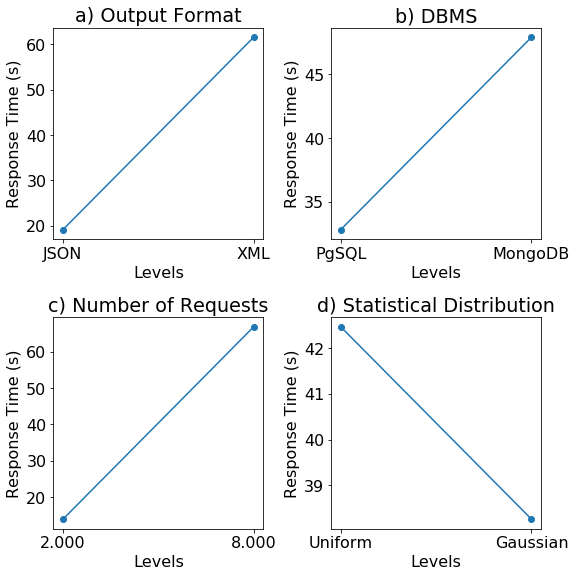

In [28]:
#Efeito Principal Fator X1
avg_negative_x1 = (results[0] + results[2] +
           results[4] + results[6] +
           results[8] + results[10] +
           results[12] + results[14])/8

avg_positive_x1 = (results[1] + results[3] +
           results[5] + results[7] + 
           results[9] + results[11] + 
           results[13] + results[15])/8

#Efeito Principal Fator X2
avg_negative_x2 = (results[0] + results[1] +
           results[4] + results[5] +
           results[8] + results[9] +
           results[12] + results[13])/8

avg_positive_x2 = (results[2] + results[3] +
           results[6] + results[7] +
           results[10] + results[11] +
           results[14] + results[15])/8

#Efeito Principal Fator X3
avg_negative_x3 = (results[0] + results[1] +
           results[2] + results[3] +
           results[8] + results[9] +
           results[10] + results[11])/8

avg_positive_x3 = (results[4] + results[5] +
           results[6] + results[7] +
           results[12] + results[13] +
           results[14] + results[15])/8

#Efeito Principal Fator X4
avg_negative_x4 = (results[0] + results[1] +
           results[2] + results[3] +
           results[4] + results[5] +
           results[6] + results[7])/8

avg_positive_x4 = (results[8] + results[9] +
           results[10] + results[11] +
           results[12] + results[13] +
           results[14] + results[15])/8

x1 = [avg_negative_x1, avg_positive_x1]
print("a) Output Format\navg_json: {}\navg_xml: {}\nspeed: {}".format(avg_negative_x1, avg_positive_x1, avg_positive_x1/avg_negative_x1))
x2 = [avg_negative_x2, avg_positive_x2]
print("\nb) DBMS\navg_pgsql: {}\navg_mongo: {}\nspeed: {}".format(avg_negative_x2, avg_positive_x2, avg_positive_x2/avg_negative_x2))
x3 = [avg_negative_x3, avg_positive_x3]
print("\nc) NR\navg_2000: {}\navg_8000: {}\nspeed: {}".format(avg_negative_x3, avg_positive_x3, avg_positive_x3/avg_negative_x3))
x4 = [avg_negative_x4, avg_positive_x4]
print("\nd) SD\navg_uniform: {}\navg_gaussian: {}\nspeed: {}".format(avg_negative_x4, avg_positive_x4, avg_negative_x4/avg_positive_x4))

plot_influence_factor([x1,x2,x3,x4], ['a) Output Format', 'b) DBMS', 'c) Number of Requests', 'd) Statistical Distribution'],  [['JSON', 'XML'], ['PgSQL', 'MongoDB'],['2.000', '8.000'],['Uniform', 'Gaussian']])